In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [3]:
ca_behavioral_healthcare_df = pd.read_csv('CA behavioral health dataset.csv')
ca_behavioral_healthcare_df.head()

,id,County_Name,Region,Census_Designation,Fiscal_Year,Original_Plan_Type,Base_Plan_Type,Data_Type,Compliance_Area,Full_Compliance_Name,...,Beneficiary_Numerical_Age_Group,Age_Label,Finding,Total_FTEs_Required,Total_FTEs_Reported,Number_Of_Providers,Expected_Utilization,Request_To_First_Encounter_Appointment_Offer_Date_Percentage,Description_Text,AAS
0,1.0,Alameda,Alameda,Urban,2021-2022,MHP,SMHS,Capacity and Composition,Capacity and Composition,Outpatient SMHS Providers – Adult (21+),...,(21+),Adult (21+),Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Alameda,Alameda,Urban,2021-2022,MHP,SMHS,Capacity and Composition,Capacity and Composition,Outpatient SMHS Providers – Children/Youth (0-20),...,(0-20),Children/Youth (0-20),Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Alameda,Alameda,Urban,2021-2022,MHP,SMHS,Capacity and Composition,Capacity and Composition,Psychiatry Services – Adult (21+),...,(21+),Adult (21+),Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Alameda,Alameda,Urban,2021-2022,MHP,SMHS,Capacity and Composition,Capacity and Composition,Psychiatry Services – Children/Youth (0-20),...,(0-20),Children/Youth (0-20),Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Alameda,Alameda,Urban,2021-2022,MHP,SMHS,Time or Distance,Time or Distance,Outpatient SMHS Providers – Adult (21+),...,(21+),Adult (21+),Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
ca_behavioral_healthcare_df = ca_behavioral_healthcare_df.drop(columns = ['County_Name', 'Region'])

In [32]:
from sklearn.preprocessing import StandardScaler
x = ca_behavioral_healthcare_df[['Fiscal_Year', 'Census_Designation', 'Original_Plan_Type', 'Data_Type', 'Compliance_Area', 'Full_Compliance_Name', 'Service_Type', 'Urgency_Type', 'Beneficiary_Age', 'Total_FTEs_Required', 'Total_FTEs_Reported', 'Request_To_First_Encounter_Appointment_Offer_Date_Percentage', 'AAS']]
y = ca_behavioral_healthcare_df['Finding']
print(x)

     Fiscal_Year Census_Designation Original_Plan_Type  \
0      2021-2022              Urban                MHP   
1      2021-2022              Urban                MHP   
2      2021-2022              Urban                MHP   
3      2021-2022              Urban                MHP   
4      2021-2022              Urban                MHP   
...          ...                ...                ...   
6126   2024-2025              Urban                MHP   
6127   2024-2025              Urban                MHP   
6128   2024-2025              Urban                MHP   
6129         NaN                NaN                NaN   
6130         NaN                NaN                NaN   

                     Data_Type           Compliance_Area  \
0     Capacity and Composition  Capacity and Composition   
1     Capacity and Composition  Capacity and Composition   
2     Capacity and Composition  Capacity and Composition   
3     Capacity and Composition  Capacity and Composition   
4  

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.impute import SimpleImputer

# Identify categorical and numerical columns
categorical_cols = x_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = x_train.select_dtypes(include=['number']).columns

# One-hot encode categorical features
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

# Align columns - crucial for consistent dummy variables between train and test
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)

# Impute missing values in numerical columns before scaling
imputer = SimpleImputer(strategy='mean')

# Fit on training data and transform both train and test data
x_train_imputed = imputer.fit_transform(x_train_encoded)
x_test_imputed = imputer.transform(x_test_encoded)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)


In [35]:
# Identify and remove NaNs from y_train and corresponding rows from x_train_scaled
nan_in_y_train_mask = y_train.isnull()
y_train_cleaned = y_train[~nan_in_y_train_mask]
x_train_scaled_cleaned = x_train_scaled[~nan_in_y_train_mask]

# Do the same for the test set
nan_in_y_test_mask = y_test.isnull()
y_test_cleaned = y_test[~nan_in_y_test_mask]
x_test_scaled_cleaned = x_test_scaled[~nan_in_y_test_mask]

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train_scaled_cleaned, y_train_cleaned)
y_pred = classifier.predict(x_test_scaled_cleaned)

Accuracy: 84.29%
Confusion Matrix:
[[122 126]
 [ 65 903]]


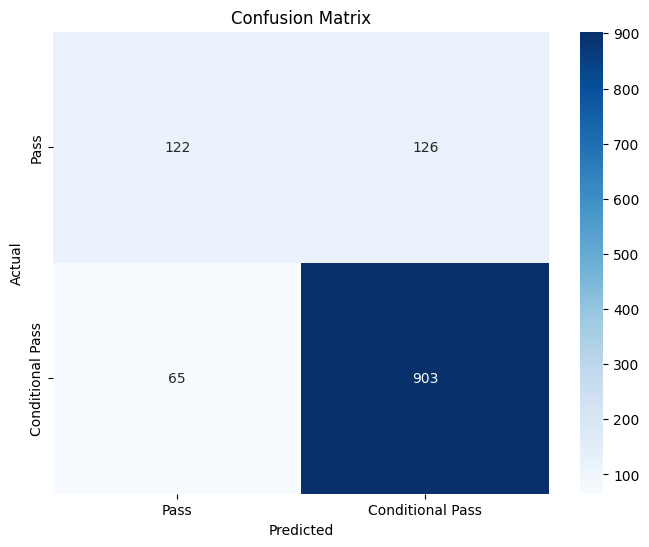

In [36]:
accuracy = accuracy_score(y_test_cleaned, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test_cleaned, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Get the unique class labels from the cleaned test set
class_labels = y_test_cleaned.unique()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
print(classification_report(y_test_cleaned, y_pred))

                  precision    recall  f1-score   support

Conditional Pass       0.65      0.49      0.56       248
            Pass       0.88      0.93      0.90       968

        accuracy                           0.84      1216
       macro avg       0.76      0.71      0.73      1216
    weighted avg       0.83      0.84      0.83      1216



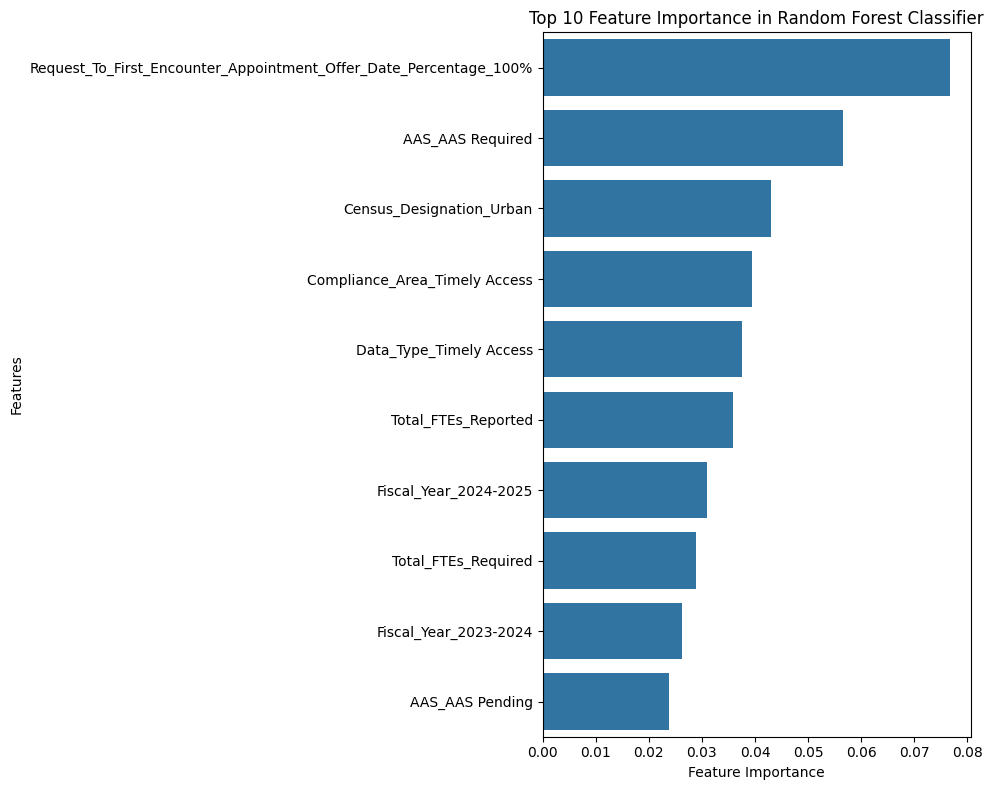

In [38]:
feature_importances = classifier.feature_importances_
feature_names = x_train_encoded.columns

# Create a DataFrame for better sorting and plotting
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df.head(10)) # Display top 20 features for readability
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance in Random Forest Classifier')
plt.tight_layout()
plt.show()